In [3]:
import geopandas as gpd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
gdf = gpd.read_file(r"D:\DRSD MK3\Project\MAPID\Actual Bootcamp\Introduction Python For Spatial Data\demografi_kota_surabaya.geojson")
display(gdf.head(10))

fid ID_PROV    PROVINSI ID_KABKOT         KABKOT    ID_KEC  \
0  81107      35  JAWA TIMUR     35.78  KOTA SURABAYA  35.78.19   
1  80983      35  JAWA TIMUR     35.78  KOTA SURABAYA  35.78.05   
2  80982      35  JAWA TIMUR     35.78  KOTA SURABAYA  35.78.03   
3  80966      35  JAWA TIMUR     35.78  KOTA SURABAYA  35.78.16   
4  80961      35  JAWA TIMUR     35.78  KOTA SURABAYA  35.78.04   
5  80917      35  JAWA TIMUR     35.78  KOTA SURABAYA  35.78.20   
6  80823      35  JAWA TIMUR     35.78  KOTA SURABAYA  35.78.01   
7  80788      35  JAWA TIMUR     35.78  KOTA SURABAYA  35.78.16   
8  80598      35  JAWA TIMUR     35.78  KOTA SURABAYA  35.78.24   
9  80552      35  JAWA TIMUR     35.78  KOTA SURABAYA  35.78.13   

          KECAMATAN        ID_DESA              DESA  JUMLAH PENDUDUK  ...  \
0            BENOWO  35.78.19.1005      ROMOKALISARI             3299  ...   
1         TEGALSARI  35.78.05.1005          WONOREJO            26156  ...   
2           RUNGKUT  35.78.03.1005          WONOREJO            20255  ...   
3          SEMAMPIR  35.78.16.1003        WONOKUSUMO            68777  ...   
4         WONOKROMO  35.78.04.1001         WONOKROMO            39613  ...   
5            WIYUNG  35.78.20.1001            WIYUNG            19293  ...   
6     KARANG PILANG  35.78.01.1004       WARU GUNUNG            10049  ...   
7          SEMAMPIR  35.78.16.1004             UJUNG            33396  ...   
8  TENGGILIS MEJOYO  35.78.24.1003  TENGGILIS MEJOYO            11462  ...   
9           BUBUTAN  35.78.13.1005      TEMBOK DUKUH            25279  ...   

   MENGURUS RUMAH TANGGA  PERDAGANGAN  PERAWAT  NELAYAN  \
0                    530            9        2        1   
1                   5040           52       10        0   
2                   2735           15       30        5   
3                  13898           29       36        1   
4                   5925           37       39        3   
5                   3177            3       33        0   
6                   1825            4       13        0   
7                   6681           12       42        0   
8                   1957           48        3        0   
9                   4418           13       12        1   

   PELAJAR DAN MAHASISWA  GURU  WIRASWASTA  PENGACARA  PEKERJAAN LAINNYA  \
0                    573    30         159          0                  0   
1                   6481   117         860          2                  0   
2                   5103   174        1212          3                  0   
3                  13991   335        4155          2                  0   
4                   8808   415        2282          1                  0   
5                   3694   175         686          3                  0   
6                   1748    72         416          0                  0   
7                   7160    89        2285          0                  0   
8                   2251    99         921          3                  0   
9                   5395   205         982          0                  0   

                                            geometry  
0  MULTIPOLYGON Z (((112.65612 -7.19378 0, 112.65...  
1  MULTIPOLYGON Z (((112.73505 -7.26808 0, 112.73...  
2  MULTIPOLYGON Z (((112.84346 -7.30556 0, 112.84...  
3  MULTIPOLYGON Z (((112.76093 -7.21297 0, 112.76...  
4  MULTIPOLYGON Z (((112.73743 -7.29975 0, 112.73...  
5  MULTIPOLYGON Z (((112.69749 -7.30169 0, 112.69...  
6  MULTIPOLYGON Z (((112.66354 -7.32963 0, 112.66...  
7  MULTIPOLYGON Z (((112.75664 -7.19818 0, 112.75...  
8  MULTIPOLYGON Z (((112.76546 -7.31442 0, 112.76...  
9  MULTIPOLYGON Z (((112.72088 -7.24716 0, 112.72...  

[10 rows x 103 columns]

In [39]:
null_data = gdf.isnull().sum()
print(null_data.head(50))

fid                               0
ID_PROV                           0
PROVINSI                          0
ID_KABKOT                         0
KABKOT                            0
ID_KEC                            0
KECAMATAN                         0
ID_DESA                           0
DESA                              0
JUMLAH PENDUDUK                   0
JUMLAH KK                         0
LUAS WILAYAH (KM2)                0
KEPADATAN PENDUDUK                0
PERPINDAHAN PENDUDUK              0
JUMLAH MENINGGAL                  0
PERUBAHAN DATA                    0
JUMLAH WAJIB KTP                  0
JUMLAH REKAM WAJIB KTP            0
ISLAM                             0
KRISTEN                           0
KATHOLIK                          0
HINDU                             0
BUDDHA                            0
KONGHUCU                          0
KEPERCAYAAN TERHADAP TUHAN YME    0
LAKI-LAKI                         0
PEREMPUAN                         0
BELUM KAWIN                 

In [40]:
gdf[['JUMLAH PENDUDUK', 'KEPADATAN PENDUDUK', 'JUMLAH KK', 'JUMLAH WAJIB KTP']].describe()

JUMLAH PENDUDUK  KEPADATAN PENDUDUK     JUMLAH KK  JUMLAH WAJIB KTP
count       154.000000          154.000000    154.000000        154.000000
mean      19347.266234           57.594005   6436.785714      14445.435065
std       11772.577708           35.045256   3790.130684       8597.101428
min           0.000000            0.000000      0.000000          0.000000
25%       11872.500000           35.342710   3903.750000       8851.750000
50%       15991.000000           47.602888   5443.500000      12176.500000
75%       23063.000000           68.655206   7771.500000      17408.750000
max       68777.000000          204.739153  21647.000000      48684.000000

In [41]:
kecamatan_population = gdf.groupby('KECAMATAN')['JUMLAH PENDUDUK'].sum()
kecamatan_top_3_series = kecamatan_population.sort_values(ascending=False).head(3)
kecamatan_top_3_df = kecamatan_top_3_series.reset_index()
print(kecamatan_top_3_df)

    KECAMATAN  JUMLAH PENDUDUK
0  TAMBAKSARI           227025
1     SAWAHAN           198516
2    KENJERAN           185294


In [11]:
desa_top_3_pd = gdf.sort_values(by='KEPADATAN PENDUDUK', ascending=False).head(3)
print(desa_top_3_pd[['DESA','KEPADATAN PENDUDUK']])

                    DESA  KEPADATAN PENDUDUK
3             WONOKUSUMO          204.739153
29        SIDOTOPO WETAN          187.881223
13  TANAH KALI KEDINDING          186.571407


Text(0.5, 1.0, 'PETA BATAS ADMINISTRATIF KOTA SURABAYA')

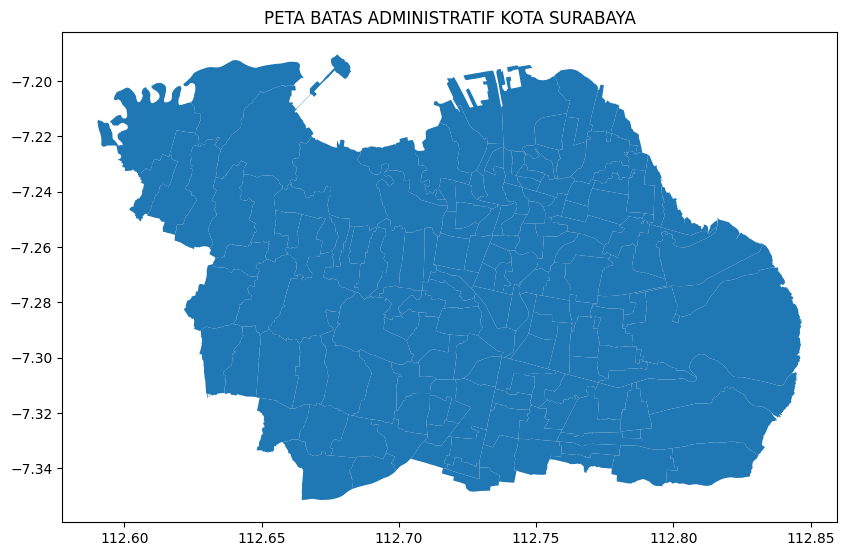

In [43]:
gdf.plot(figsize=(10,10))
plt.title("PETA BATAS ADMINISTRATIF KOTA SURABAYA")

In [44]:
gdf['centroid'] = gdf.geometry.centroid
print(gdf[['DESA', 'centroid']].head(155))

                  DESA                    centroid
0         ROMOKALISARI   POINT (112.6398 -7.20502)
1             WONOREJO  POINT (112.73174 -7.27113)
2             WONOREJO   POINT (112.8148 -7.31131)
3           WONOKUSUMO  POINT (112.75525 -7.21828)
4            WONOKROMO  POINT (112.73161 -7.30513)
..                 ...                         ...
149      BABAT JERAWAT   POINT (112.6278 -7.24188)
150          ASEM ROWO  POINT (112.70363 -7.24531)
151              AMPEL  POINT (112.74317 -7.22917)
152  ALUN-ALUN CONTONG  POINT (112.73846 -7.24965)
153          AIRLANGGA  POINT (112.75779 -7.27306)

[154 rows x 2 columns]


C:\Users\drsdi\AppData\Local\Temp\ipykernel_5228\3042366104.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


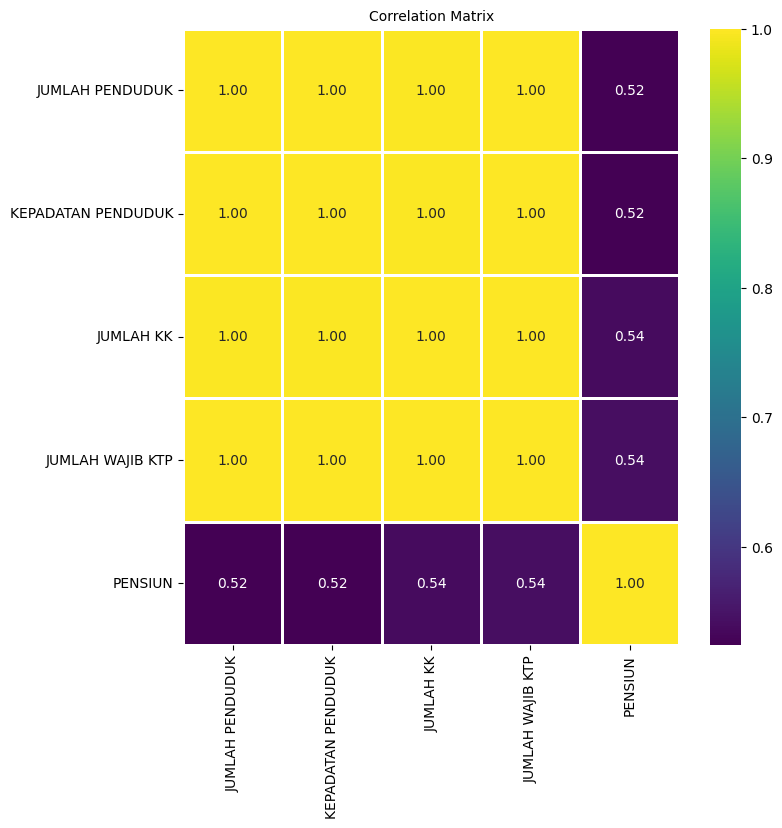

In [12]:
correlation = gdf [['JUMLAH PENDUDUK', 'KEPADATAN PENDUDUK', 'JUMLAH KK', 'JUMLAH WAJIB KTP', 'PENSIUN']].corr()

plt.figure(figsize=(8,8))
sns.heatmap(correlation, annot=True, fmt =".2f", cmap="viridis", linewidths=1)
plt.title("Correlation Matrix", fontsize=10)
plt.show()


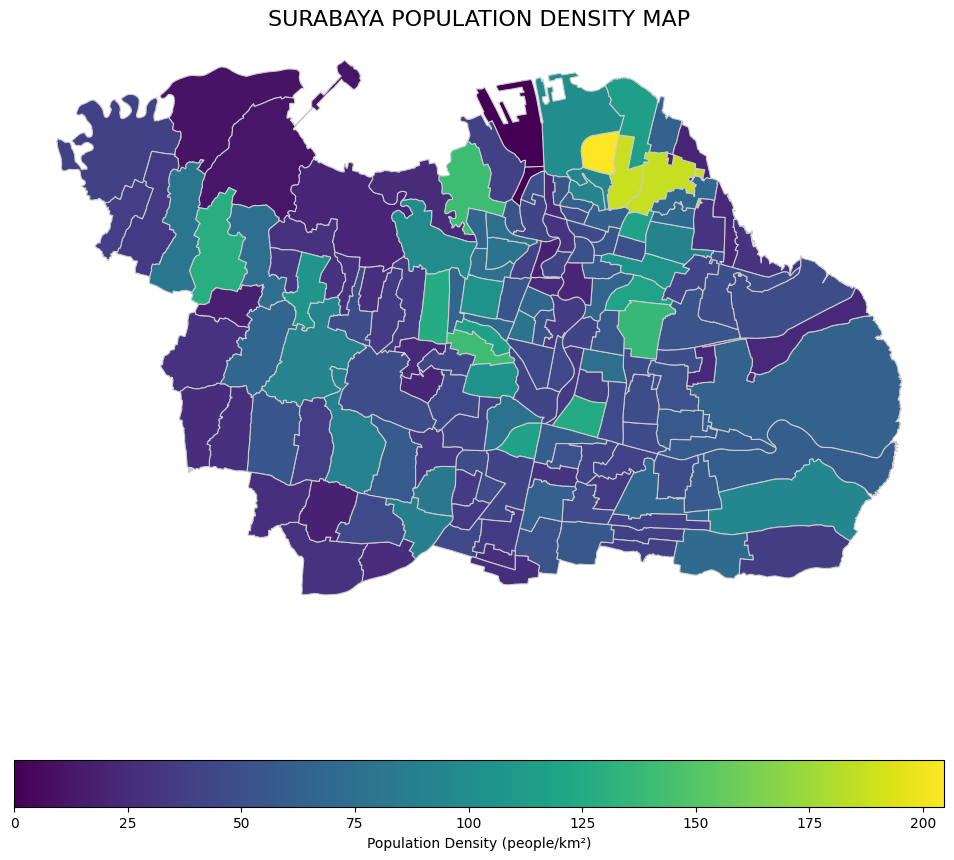

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

gdf.plot(
    column='KEPADATAN PENDUDUK', 
    cmap='viridis',             
    linewidth=0.8,              
    ax=ax,                      
    edgecolor='0.8',            
    legend=True,                
    legend_kwds={'label': "Population Density (people/km²)",
                 'orientation': "horizontal"}
)

ax.set_title("SURABAYA POPULATION DENSITY MAP", fontsize=16)
ax.set_axis_off() 

plt.show()

In [9]:
map_center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=12, tiles="cartodbpositron")

gdf_for_map = gdf.copy()
if 'centroid' in gdf_for_map.columns:
    gdf_for_map = gdf_for_map.drop(columns=['centroid'])

folium.Choropleth(
    geo_data=gdf_for_map,
    name='Choropleth - Population Density',
    data=gdf_for_map,
    columns=['DESA', 'KEPADATAN PENDUDUK'],
    key_on='feature.properties.DESA',
    fill_color='magma',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population Density (people/km²)'
).add_to(mymap)

folium.GeoJson(
    gdf_for_map,
    name='Village Information',
    style_function=lambda x: {'color':'transparent', 'fillColor':'transparent', 'weight':0},
    tooltip=folium.GeoJsonTooltip(
        fields=['DESA', 'KECAMATAN'],
        aliases=['Desa:', 'Kecamatan:'],
        sticky=True
    ),
    popup=folium.GeoJsonPopup(
        fields=['DESA', 'KECAMATAN', 'JUMLAH KK', 'LUAS WILAYAH (KM2)'],
        aliases=['Desa:', 'Kecamatan:', 'Number of Families (KK):', 'Area (km²):'],
        localize=True,
        sticky=True
    )
).add_to(mymap)

folium.LayerControl().add_to(mymap)

mymap

C:\Users\drsdi\AppData\Local\Temp\ipykernel_9468\3174349897.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]


# Summary
    - 3 Kecamatan dengan julmah penduduk tertinggi:
        - TAMBAKSARI                227.025 jiwa
        - SAWAHAN                   198.516 jiwa
        - KENJERAN                  185.294 jiwa

    - 3 Desa dengan kepadatan penduduk tertinggi:
        - WONOKUSUMO                204,739153 jiwa/km2
        - SIDOTOPO WETAN            187,881223 jiwa/km2
        - TANAH KALI KEDINDING      186,571407 jiwa/km2

    - Insight korelasi antar variabel demografi dengan variabel
    
        Analisis terhadap matriks korelasi data demografi Surabaya mengungkap beberapa pola hubungan yang signifikan antar variabel. Temuan yang paling menonjol adalah adanya korelasi positif sempurna (1,00) antara 'JUMLAH PENDUDUK', 'JUMLAH KK', dan 'JUMLAH WAJIB KTP'. Hubungan yang sangat kuat ini dapat dianggap logis, mengingat ketiga variabel tersebut pada dasarnya merupakan proksi atau indikator yang berbeda untuk mengukur skala populasi di suatu wilayah. Secara inheren, area dengan lebih banyak penduduk secara proporsional juga akan memiliki lebih banyak kepala keluarga dan warga usia wajib KTP.
        
        Namun, sebuah anomali yang signifikan muncul dari korelasi sempurna (1,00) yang juga melibatkan variabel 'KEPADATAN PENDUDUK'. Secara teoretis, korelasi yang sempurna antara kepadatan dan jumlah penduduk hanya mungkin terjadi apabila setiap unit administratif—dalam hal ini desa atau kelurahan—memiliki luas wilayah yang identik, sebuah kondisi yang sangat tidak mungkin dalam realitas geografis. Oleh karena itu, temuan ini tidak seharusnya diinterpretasikan sebagai hubungan demografis yang nyata, melainkan sebagai indikasi kuat adanya potensi masalah kualitas data atau kesalahan dalam proses perhitungan kolom kepadatan penduduk yang memerlukan investigasi lebih lanjut.
        
        Berbeda dengan hubungan sempurna tersebut, variabel 'PENSIUN' menunjukkan korelasi positif yang lebih moderat, dengan nilai berkisar antara 0,52 hingga 0,54 terhadap semua variabel populasi lainnya. Korelasi ini mengindikasikan adanya kecenderungan bahwa wilayah yang lebih padat penduduknya juga cenderung memiliki jumlah pensiunan yang lebih banyak. Akan tetapi, hubungan yang tidak sempurna ini secara realistis mencerminkan bahwa demografi usia tidak terdistribusi secara seragam. Hal tersebut berarti, beberapa wilayah padat mungkin didominasi oleh populasi usia produktif, sementara wilayah lain bisa jadi memiliki konsentrasi penduduk usia tua yang lebih tinggi.
        
        Secara keseluruhan, analisis korelasi ini menyimpulkan bahwa sebagian besar indikator populasi dalam dataset ini sangat saling bergantung dan bersifat kolinear. Sementara itu, data kepadatan penduduk menunjukkan anomali yang memerlukan validasi, dan data jumlah pensiunan menunjukkan hubungan yang lebih realistis dan moderat dengan skala populasi. Wawasan ini krusial sebagai landasan sebelum melakukan analisis pemodelan yang lebih kompleks.